In [30]:
import pickle
import numpy as np
from matplotlib import pyplot as plt

with open('tuning_3.4.pickle', 'rb') as f:
    data = pickle.load(f)

    print(data)

{'neuron4': array([[18.1, 12.1,  6. , ..., 26.7, 25.4, 23.1],
       [17.4, 14.8,  6.7, ..., 27.3, 27. , 25.4],
       [17.6, 14.8,  7.6, ..., 29.4, 26.2, 22.9],
       ...,
       [20.1, 12.8,  7.6, ..., 25.3, 26.5, 24.3],
       [18.1, 12.3,  7.4, ..., 26.3, 27. , 23.9],
       [17.9, 15.3,  6.4, ..., 26.2, 26.8, 25. ]]), 'stim': array([  0.,  15.,  30.,  45.,  60.,  75.,  90., 105., 120., 135., 150.,
       165., 180., 195., 210., 225., 240., 255., 270., 285., 300., 315.,
       330., 345.]), 'neuron3': array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0.9, 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0.2, 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]]), 'neuron2': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.

In [31]:
neuron_1 = data["neuron1"]
neuron_2 = data["neuron2"]
neuron_3 = data["neuron3"]
neuron_4 = data["neuron4"]
stim = data["stim"]

In [32]:
print(neuron_1)

[[19.7 27.4 28.1 ...  0.   9.8 16.1]
 [21.3 28.7 32.8 ...  0.   8.3 16.6]
 [21.5 27.3 29.3 ...  0.   8.6 17.2]
 ...
 [21.9 28.7 30.  ...  0.   8.7 14.4]
 [24.1 28.1 29.1 ...  0.   7.1 15.9]
 [24.  28.3 28.4 ...  0.   8.2 19.1]]


In [33]:
len(stim)

24

In [34]:
len(neuron_1[0])

24

In [49]:
# Question 1) Find the form of the neurons plotted against the stimulus
neuron_1_t = neuron_1.transpose()
neuron_2_t = neuron_2.transpose()
neuron_3_t = neuron_3.transpose()
neuron_4_t = neuron_4.transpose()

In [50]:
neurons_t = [neuron_1_t, neuron_2_t, neuron_3_t, neuron_4_t]
total_neurons = []
totals = []
total = 0
for neuron_t in neurons_t:
    for stimuli in neuron_t:
        for firing_rate in stimuli:
            total = total + firing_rate

        totals.append(total)
        total = 0
    
    for i in range(0, 24):
        totals[i] = totals[i] / 100
    
    total_neurons.append(totals)
    totals = []

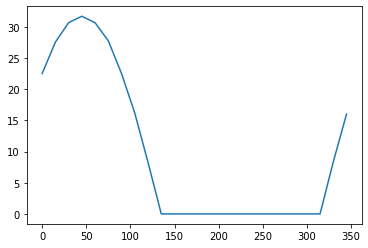

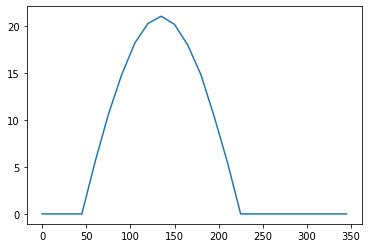

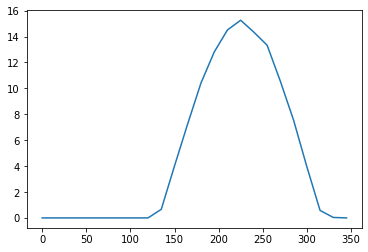

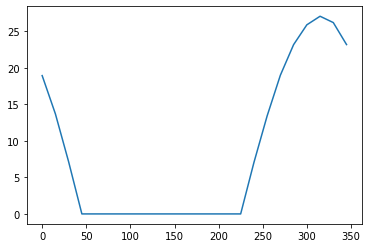

In [51]:
x = stim
for total in total_neurons:
    plt.plot(x, total)
    plt.show()

In [57]:
# Answer 1) It's a half-rectified cosine
# Question 2) Which of the neurons is NOT Poisson?

# Recall the fano factor: V^2[X]/E[X] = 1.
# Recall that spike count = firing_rate * time_window
# And rememering that E[aX] = aE[x] && V[aX] = a^2V[X]
# Given a 10 second time window then => V[f_rate] / E[f_rate] = 1/10
i = 1
for neuron_t in neurons_t:
    print("Neuron " + str(i))
    for stimuli in neuron_t:
        mean = np.mean(stimuli)
        var = np.var(stimuli)
        if(var != 0):
            print(var/mean)
    
    print("----")
    i = i + 1
    

Neuron 1
0.08482848011363636
0.10261098813368655
0.10735705905357841
0.10172047182010284
0.09790973128098092
0.075616116134145
0.09305821704737356
0.08340980258679369
0.07865621595448495
0.0830574712643678
0.11510216698932113
----
Neuron 2
0.10154676258992808
0.10792361438957604
0.09961638192990746
0.08751859175042564
0.09727981877277653
0.11069054060467981
0.09109900990099011
0.110637585383462
0.10084737871938468
0.10536083269082501
0.12634667879890812
----
Neuron 3
1.7122048192771082
0.8171974569932688
0.6899726385260553
0.37861624891961976
0.3186804123711341
0.2647622329427981
0.199213630406291
0.28875408006695497
0.28696564398769786
0.3420758293838861
0.5281818061265084
0.9644907805001263
2.0064290657439448
0.7362222222222219
----
Neuron 4
0.11033386117709161
0.08915400335741919
0.10440944109819301
0.1094310099573257
0.09683474891968409
0.08377591198610305
0.0959891313723799
0.09094208494208493
0.11059329295316882
0.07313553113553115
0.10998366168038971
----


In [64]:
# Neuron 3 is clearly not Poisson. (!= 0.1)
# Question 3) Direction in degrees of the population vector
# Finally, we ran an additional set of experiments in which we exposed each of the neurons to 
# a single stimulus of unknown direction for 10 trials of 10 seconds each. 
# We have placed the results of this experiment in the following file
with open('pop_coding_3.4.pickle', 'rb') as f:
    data = pickle.load(f)

    print(data)

{'c1': array([0.70710678, 0.70710678]), 'r1': array([11.9, 12.8, 13.9, 12.1, 11.3, 12.2, 12.9, 12.4, 13.2, 10.7]), 'r3': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'c2': array([ 0.70710678, -0.70710678]), 'c3': array([-0.70710678, -0.70710678]), 'r2': array([18.8, 18. , 19. , 19.1, 18.1, 21.5, 20.3, 21.2, 18.6, 20.4]), 'c4': array([-0.70710678,  0.70710678]), 'r4': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])}


In [68]:
# pop_coding contains four vectors named r1r1, r2r2, r3r3, and r4r4 that contain the responses (firing rate in Hz) 
# of the four neurons to this mystery stimulus. It also contains four vectors named c1c1, c2c2, c3c3, and c4c4. 
# These are the basis vectors corresponding to neuron 1, neuron 2, neuron 3, and neuron 4.
r1 = np.mean(data["r1"])
r2 = np.mean(data["r2"])
r3 = np.mean(data["r3"])
r4 = np.mean(data["r4"])
c1 = data["c1"]
c2 = data["c2"]
c3 = data["c3"]
c4 = data["c4"]

In [78]:
r = [r1, r2, r3, r4]
c = [c1, c2, c3, c4]
R_div = []
i = 0
for total in total_neurons:
    R_div.append(r[i] / np.max(total))
    i = i + 1
    
print(R_div)
print(R_div[0]*c1)

[0.3891885072696881, 0.925530400113911, 0.0, 0.0]
[0.27519783 0.27519783]


In [84]:
vec_pop = np.sum([R_div[0]*c1, R_div[1]*c2, R_div[2]*c3, R_div[3]*c4], axis=0)
print(vec_pop)

[ 0.92964665 -0.37925099]


In [89]:
mod = np.linalg.norm(vec_pop)
theta = np.degrees(np.arctan(vec_pop[1] / vec_pop[0]))
print(mod)
print(theta)

1.0040289914767522
-22.193090003549205
